In [1]:
import torch
import train
from data_pipeline import DatasetsGenerator
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F
from tqdm import tqdm

conf = train.load_settings("./settings/model_testing.yaml")

dataset_gen = DatasetsGenerator(
    annotations_path = conf['paths']['annotations_path'],
    images_dir = conf['paths']['images_dir'],
    novel_class_ids_path = conf['paths']['novel_classes_ids_path'],
    train_set_path = conf['paths']['train_base_annotations_path'],
    val_set_path = conf['paths']['val_base_annotations_path'],
    test_set_path = conf['paths']['test_base_annotations_path'],
    use_fixed_novel_sets = conf['data']['use_fixed_sets'],
    novel_train_set_path = conf['paths']['train_novel_annotations_path'],
    novel_val_set_path = conf['paths']['val_novel_annotations_path'],
    novel_test_set_path = conf['paths']['test_novel_annotations_path']
)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=2.35s)
creating index...
index created!


In [2]:
def showgrid(img, heat_label):
    batch_size = img.shape[0]
    f, axarr = plt.subplots(2, batch_size, constrained_layout=True)

    for b in range(batch_size):
        axarr[0,b].imshow(F.to_pil_image(img[b]))
        axarr[1,b].imshow(F.to_pil_image(torch.max(heat_label[b], dim=0).values))
    
    for b in axarr.flat:
        plt.axis('on')
        b.set_xticks([])
        b.set_yticks([])

    plt.show()

In [12]:
dataset_base_train, dataset_base_val, dataset_base_test = dataset_gen.get_base_sets_dataloaders(
                conf['training']['batch_size'], conf['training']['num_workers'],
                conf['training']['pin_memory'], conf['training']['drop_last'], shuffle=True
            )

In [ ]:
for i, (image, label, n_landmarks, padded_landmarks) in tqdm(enumerate(dataset_base_train), total=len(dataset_base_train)):
    print(i)
    print(n_landmarks)
    print("len label", len(label))
    print(image.shape)
    reg_label = label[0]
    heat_base_label = label[1]
    heat_novel_label = label[2]
    
    # for im, rl, hbl, hnl, n_l, p_l in zip(image, reg_label, heat_base_label, heat_novel_label, n_landmarks, padded_landmarks):
    #     print("----")
    #     print(im.shape)
    #     print(rl.shape)
    #     print(hbl.shape)
    #     print(hnl.shape)
    #     print(n_l)
    #     print(p_l)
    # break

  0%|          | 0/397 [00:00<?, ?it/s]

0
tensor([1, 1, 2, 1])
len label 3
torch.Size([4, 3, 512, 512])
----
torch.Size([3, 512, 512])
torch.Size([4, 128, 128])
torch.Size([240, 128, 128])
torch.Size([0, 128, 128])
tensor(1)
{'center_point': [tensor([271.3293, 273.5878, 310.7493, 192.0000], dtype=torch.float64), tensor([362.0381, 240.9172, 210.3855, 275.0995], dtype=torch.float64)], 'size': [tensor([453.7485, 303.5522, 120.0708,  86.4865], dtype=torch.float64), tensor([544.8319, 491.6178,  59.5782,  59.6440], dtype=torch.float64)], 'category_id': tensor([2512, 1730, 4629, 4559])}
----
torch.Size([3, 512, 512])
torch.Size([4, 128, 128])
torch.Size([240, 128, 128])
torch.Size([0, 128, 128])
tensor(1)
{'center_point': [tensor([  0.0000,   0.0000, 135.5516,   0.0000]), tensor([  0.0000,   0.0000, 286.2545,   0.0000])], 'size': [tensor([ 0.0000,  0.0000, 71.7404,  0.0000]), tensor([ 0.0000,  0.0000, 62.3709,  0.0000])], 'category_id': tensor([  -1,   -1, 4629,   -1])}
----
torch.Size([3, 512, 512])
torch.Size([4, 128, 128])
torch

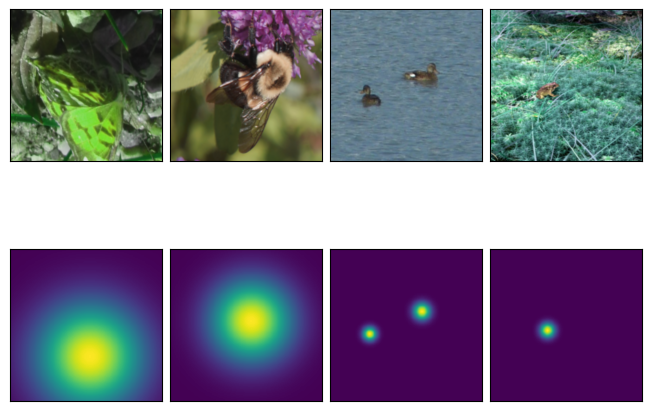

In [28]:
showgrid(image, heat_base_label)